# Table of Contents:
1. [Introduction](#Intro)
2. [Collect data](#Collect)
3. [Data Cleaning & Handling Missing Data](#Cleaning)
4. [Descriptive Statistics](#Descr)
5. [Data Visualization](#Visu)
6. [Conclusion](#CCL)

# **1) Introduction** <a name="Intro"> </a>

This data set is created using Standard Meteorological Data gathered from
Coastal-Marine Automated Network (C-MAN) stations and moored (weather)
buoys monitored by the National Data Buoy Center (NDBC) during 2019. Only
buoys and stations with acceptable level of available data for year 2019 are
listed in the data set. The values under the columns for each buoy are the
annual mean for 2019. A complete list of stations can be found here:
https://www.ndbc.noaa.gov

We first introduce all the libraries we will need for the project:


In [2]:
import matplotlib.pyplot as plt       #importing matplot library
import numpy as np                    #importing numpy library
import pandas as pd                   #importing pandas library
import seaborn as sns                 #importing seaborn library
import folium                         #importing map library
from scipy import stats         
import matplotlib.pyplot as plt
import plotly.express as px  

# **2) Collect data** <a name="Collect"> </a>

This line is to import the database of the project from Google Drive, but since we want our project to be public, we will use a github link


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Let's create a path variable to contain the directory of the csv file we have and then read our database using pandas:

In [4]:
path1='https://raw.githubusercontent.com/simonssg67/DataProject1/main/OceanicData.csv'
#For google drive: path2='/content/drive/My Drive/MECG542-DataScience/Project/OceanicData.csv'
database=pd.read_csv(path1)

Then we create a dataframe using pandas to make our database readable before doing some cleaning 

In [5]:
df = pd.DataFrame(database)
df

,Unnamed: 0,Station_Name,Owner,Latitude,Longitude,Wind Dir.,Wind speed,Wave Height,Dom Wave Period,Ave Wave Period,Wave Dir.,Sea Level Pressure,Air Temp.,Sea Surface Temp.,Dewpoint Temp.,Station Visib.,Water Level,Energy Flux,Wave Height Cat,Wave Period Cat
0,0,44005,Shell Oil Stations,-69.128,43.204,194.934726,5.7799155326138045,1.3601703084832888,7.705,5.288071979434465,161.282,1016.041,9.710,11.016,11.471,NaN,NaN,4790.355456,Tall,Long
1,1,44095,Shell Oil Stations,-75.330,35.750,NaN,NaN,1.3402403150153408,8.322,5.550170826336227,102.439,NaN,NaN,18.003,NaN,NaN,NaN,4881.524881,Tall,Long
2,2,42020,Shell Oil Stations,-96.694,26.968,135.860369,6.4575387044596395,1.2808008356546017,6.563,4.851848885793895,111.423,1015.087,24.147,25.139,21.528,NaN,NaN,3897.214164,Tall,Average
3,3,41044,Shell Oil Stations,-58.614,21.639,100.208862,5.6717065753002895,1.7124064852345138,9.369,6.34987955993052,107.313,1018.619,26.441,27.263,21.352,NaN,NaN,9117.232241,Very Tall,Long
4,4,46053,Shell Oil Stations,-119.841,34.248,222.279682,4.491136315495583,1.1334796710297683,10.070,5.965806787906875,253.150,1015.245,15.322,15.757,12.949,NaN,NaN,3753.016352,Tall,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,129,46050,Shell Oil Stations,-124.534,44.639,186.782767,5.703468408578553,2.1685737458000323,11.278,7.084051674197643,282.431,1017.672,9.511,10.281,6.348,NaN,NaN,16312.251679,Very Tall,Very Long
130,130,41110,Shell Oil Stations,-77.709,34.141,NaN,NaN,0.9220788696508208,7.729,4.84944698592854,128.766,NaN,NaN,20.315,NaN,NaN,NaN,2018.887678,Average Height,Average
131,131,42057,Shell Oil Stations,-81.422,16.908,88.282643,5.9690763129523825,1.1757429532536832,7.068,4.962691103120293,107.981,1013.414,27.874,29.020,24.852,NaN,NaN,3359.122289,Tall,Average
132,132,46061,Shell Oil Stations,-146.834,60.233,162.151742,5.955043194022875,1.382523965396301,10.159,6.2830862754267125,172.190,1010.223,8.092,9.491,NaN,NaN,NaN,5880.336264,Tall,Long


## **3) Data Cleaning & Handling Missing Data** <a name="Cleaning"> </a>

We want to modify the columns labels to make them more understandable

1.   Élément de liste
2.   Élément de liste



In [6]:
df.rename(columns={'Station_Name':'Station number',
                   'Wind speed':'Wind speed (m/s)',
                   'Wave Height':'Wave height (m)',
                   'Wind Dir.':'Wind direction (°)',
                   'Dom Wave Period':'Dominant wave period (s)',
                   'Ave Wave Period':'Avg wave period (s)',
                   'Wave Dir.':'Wave direction (°)',
                   'Sea Level Pressure':'Sea level pressure (hPa)',
                   'Air Temp.':'Air T°C',
                   'Sea Surface Temp.':'Sea surface T°C',
                   'Energy Flux':'Energy flux (kW/m)',
                   'Dewpoint Temp.':'Dewpoint T°C',
                   'Wave Height Cat':'Wave height cat',
                   'Latitude':'Longitude',
                   'Longitude':'Latitude',
                   'Wave Period Cat':'Wave period cat'},inplace=True)
#We delete the first "Unnamed column"
df.pop('Unnamed: 0')
df.head()

,Station number,Owner,Longitude,Latitude,Wind direction (°),Wind speed (m/s),Wave height (m),Dominant wave period (s),Avg wave period (s),Wave direction (°),Sea level pressure (hPa),Air T°C,Sea surface T°C,Dewpoint T°C,Station Visib.,Water Level,Energy flux (kW/m),Wave height cat,Wave period cat
0,44005,Shell Oil Stations,-69.128,43.204,194.934726,5.7799155326138045,1.3601703084832888,7.705,5.288071979434465,161.282,1016.041,9.710,11.016,11.471,NaN,NaN,4790.355456,Tall,Long
1,44095,Shell Oil Stations,-75.330,35.750,NaN,NaN,1.3402403150153408,8.322,5.550170826336227,102.439,NaN,NaN,18.003,NaN,NaN,NaN,4881.524881,Tall,Long
2,42020,Shell Oil Stations,-96.694,26.968,135.860369,6.4575387044596395,1.2808008356546017,6.563,4.851848885793895,111.423,1015.087,24.147,25.139,21.528,NaN,NaN,3897.214164,Tall,Average
3,41044,Shell Oil Stations,-58.614,21.639,100.208862,5.6717065753002895,1.7124064852345138,9.369,6.34987955993052,107.313,1018.619,26.441,27.263,21.352,NaN,NaN,9117.232241,Very Tall,Long
4,46053,Shell Oil Stations,-119.841,34.248,222.279682,4.491136315495583,1.1334796710297683,10.070,5.965806787906875,253.150,1015.245,15.322,15.757,12.949,NaN,NaN,3753.016352,Tall,Long


We check which column has some missing values

In [7]:
df.isnull().any(axis=0)

Station number              False
Owner                       False
Longitude                   False
Latitude                    False
Wind direction (°)           True
Wind speed (m/s)             True
Wave height (m)             False
Dominant wave period (s)    False
Avg wave period (s)         False
Wave direction (°)          False
Sea level pressure (hPa)     True
Air T°C                      True
Sea surface T°C              True
Dewpoint T°C                 True
Station Visib.               True
Water Level                  True
Energy flux (kW/m)          False
Wave height cat             False
Wave period cat             False
dtype: bool

Let's see how many null values we have in the dataframe to be more precise

In [8]:
missing_data=df.isnull()
for column in missing_data.columns.to_list():
    print(column)
    print(missing_data[column].value_counts())   # or you could do df[column].isnull().value_counts()
    print("")

Station number
False    134
Name: Station number, dtype: int64

Owner
False    134
Name: Owner, dtype: int64

Longitude
False    134
Name: Longitude, dtype: int64

Latitude
False    134
Name: Latitude, dtype: int64

Wind direction (°)
False    72
True     62
Name: Wind direction (°), dtype: int64

Wind speed (m/s)
False    73
True     61
Name: Wind speed (m/s), dtype: int64

Wave height (m)
False    134
Name: Wave height (m), dtype: int64

Dominant wave period (s)
False    134
Name: Dominant wave period (s), dtype: int64

Avg wave period (s)
False    134
Name: Avg wave period (s), dtype: int64

Wave direction (°)
False    134
Name: Wave direction (°), dtype: int64

Sea level pressure (hPa)
False    72
True     62
Name: Sea level pressure (hPa), dtype: int64

Air T°C
False    72
True     62
Name: Air T°C, dtype: int64

Sea surface T°C
False    132
True       2
Name: Sea surface T°C, dtype: int64

Dewpoint T°C
True     74
False    60
Name: Dewpoint T°C, dtype: int64

Station Visib.
True 

The Station visib and Water level columns are empty, let's drop them since they are not usable.

In [9]:
#Since there are only null values in these 2 columns we drop them
df.dropna(axis = 1, how ='all', inplace = True) 
df

,Station number,Owner,Longitude,Latitude,Wind direction (°),Wind speed (m/s),Wave height (m),Dominant wave period (s),Avg wave period (s),Wave direction (°),Sea level pressure (hPa),Air T°C,Sea surface T°C,Dewpoint T°C,Energy flux (kW/m),Wave height cat,Wave period cat
0,44005,Shell Oil Stations,-69.128,43.204,194.934726,5.7799155326138045,1.3601703084832888,7.705,5.288071979434465,161.282,1016.041,9.710,11.016,11.471,4790.355456,Tall,Long
1,44095,Shell Oil Stations,-75.330,35.750,NaN,NaN,1.3402403150153408,8.322,5.550170826336227,102.439,NaN,NaN,18.003,NaN,4881.524881,Tall,Long
2,42020,Shell Oil Stations,-96.694,26.968,135.860369,6.4575387044596395,1.2808008356546017,6.563,4.851848885793895,111.423,1015.087,24.147,25.139,21.528,3897.214164,Tall,Average
3,41044,Shell Oil Stations,-58.614,21.639,100.208862,5.6717065753002895,1.7124064852345138,9.369,6.34987955993052,107.313,1018.619,26.441,27.263,21.352,9117.232241,Very Tall,Long
4,46053,Shell Oil Stations,-119.841,34.248,222.279682,4.491136315495583,1.1334796710297683,10.070,5.965806787906875,253.150,1015.245,15.322,15.757,12.949,3753.016352,Tall,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,46050,Shell Oil Stations,-124.534,44.639,186.782767,5.703468408578553,2.1685737458000323,11.278,7.084051674197643,282.431,1017.672,9.511,10.281,6.348,16312.251679,Very Tall,Very Long
130,41110,Shell Oil Stations,-77.709,34.141,NaN,NaN,0.9220788696508208,7.729,4.84944698592854,128.766,NaN,NaN,20.315,NaN,2018.887678,Average Height,Average
131,42057,Shell Oil Stations,-81.422,16.908,88.282643,5.9690763129523825,1.1757429532536832,7.068,4.962691103120293,107.981,1013.414,27.874,29.020,24.852,3359.122289,Tall,Average
132,46061,Shell Oil Stations,-146.834,60.233,162.151742,5.955043194022875,1.382523965396301,10.159,6.2830862754267125,172.190,1010.223,8.092,9.491,NaN,5880.336264,Tall,Long


The Owner seem to be the same for every value and I want to verify that using a simple .value_counts function, if the result is 134, that means that the Owner is the same for every station

In [10]:
df['Owner'].value_counts() # Counts of unique values

Shell Oil Stations    134
Name: Owner, dtype: int64

Since the owner is the same for every station, we can drop this column.

In [11]:
df.pop('Owner')
df

,Station number,Longitude,Latitude,Wind direction (°),Wind speed (m/s),Wave height (m),Dominant wave period (s),Avg wave period (s),Wave direction (°),Sea level pressure (hPa),Air T°C,Sea surface T°C,Dewpoint T°C,Energy flux (kW/m),Wave height cat,Wave period cat
0,44005,-69.128,43.204,194.934726,5.7799155326138045,1.3601703084832888,7.705,5.288071979434465,161.282,1016.041,9.710,11.016,11.471,4790.355456,Tall,Long
1,44095,-75.330,35.750,NaN,NaN,1.3402403150153408,8.322,5.550170826336227,102.439,NaN,NaN,18.003,NaN,4881.524881,Tall,Long
2,42020,-96.694,26.968,135.860369,6.4575387044596395,1.2808008356546017,6.563,4.851848885793895,111.423,1015.087,24.147,25.139,21.528,3897.214164,Tall,Average
3,41044,-58.614,21.639,100.208862,5.6717065753002895,1.7124064852345138,9.369,6.34987955993052,107.313,1018.619,26.441,27.263,21.352,9117.232241,Very Tall,Long
4,46053,-119.841,34.248,222.279682,4.491136315495583,1.1334796710297683,10.070,5.965806787906875,253.150,1015.245,15.322,15.757,12.949,3753.016352,Tall,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,46050,-124.534,44.639,186.782767,5.703468408578553,2.1685737458000323,11.278,7.084051674197643,282.431,1017.672,9.511,10.281,6.348,16312.251679,Very Tall,Very Long
130,41110,-77.709,34.141,NaN,NaN,0.9220788696508208,7.729,4.84944698592854,128.766,NaN,NaN,20.315,NaN,2018.887678,Average Height,Average
131,42057,-81.422,16.908,88.282643,5.9690763129523825,1.1757429532536832,7.068,4.962691103120293,107.981,1013.414,27.874,29.020,24.852,3359.122289,Tall,Average
132,46061,-146.834,60.233,162.151742,5.955043194022875,1.382523965396301,10.159,6.2830862754267125,172.190,1010.223,8.092,9.491,NaN,5880.336264,Tall,Long


It appears that the Wind direction, Wind speed, Sea lvl pressure, Air T°C, Sea surface and Dewpoint T°C columns have a lot of missing values. Let's see in details which line contains null values

In [12]:
Winddirnull = df[df['Wind direction (°)'].isnull()]

#I decided to sort the values by Station number so that I can compare easily stations in the same geographical area to make some hypotheses
Winddirnull.sort_values(by='Station number')

,Station number,Longitude,Latitude,Wind direction (°),Wind speed (m/s),Wave height (m),Dominant wave period (s),Avg wave period (s),Wave direction (°),Sea level pressure (hPa),Air T°C,Sea surface T°C,Dewpoint T°C,Energy flux (kW/m),Wave height cat,Wave period cat
39,41108,-78.015,33.721,NaN,NaN,0.9750266512166896,7.230,4.580396871378944,153.292,NaN,NaN,20.857,NaN,2132.160457,Average Height,Average
130,41110,-77.709,34.141,NaN,NaN,0.9220788696508208,7.729,4.84944698592854,128.766,NaN,NaN,20.315,NaN,2018.887678,Average Height,Average
27,41112,-81.293,30.719,NaN,NaN,0.8926984310774067,7.824,4.8281572396225325,105.309,NaN,NaN,22.497,NaN,1883.973329,Average Height,Average
101,41113,-80.530,28.400,NaN,NaN,0.7239803497280538,8.303,4.64564068074156,98.137,NaN,NaN,24.163,NaN,1192.292948,Average Height,Average
55,41114,-80.225,27.551,NaN,NaN,0.962741874764711,8.552,4.935053959091462,76.954,NaN,NaN,25.724,NaN,2239.728784,Average Height,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,51211,-157.959,21.297,NaN,NaN,-,10.500,5.758139975152331,156.958,NaN,NaN,26.412,NaN,1997.004355,Average Height,Long
64,51212,-158.149,21.323,NaN,NaN,1.1194640834575185,13.084,7.883485543964238,234.823,NaN,NaN,26.719,NaN,4837.515907,Tall,Very Long
23,51213,-157.003,20.750,NaN,NaN,1.0104524191859214,13.145,7.131005375968732,209.396,NaN,NaN,26.904,NaN,3565.055553,Tall,Very Long
127,52200,144.789,13.354,NaN,^,1.5147007062637603,8.764,6.083044459881912,87.818,NaN,NaN,28.902,NaN,6833.739951,Very Tall,Long


In [13]:
Dewpointnull = df[df['Dewpoint T°C'].isnull()]

#I decided to sort the values by Station number so that I can compare easily stations in the same geographical area to make some hypotheses
Dewpointnull.sort_values(by='Station number')

,Station number,Longitude,Latitude,Wind direction (°),Wind speed (m/s),Wave height (m),Dominant wave period (s),Avg wave period (s),Wave direction (°),Sea level pressure (hPa),Air T°C,Sea surface T°C,Dewpoint T°C,Energy flux (kW/m),Wave height cat,Wave period cat
39,41108,-78.015,33.721,NaN,NaN,0.9750266512166896,7.230,4.580396871378944,153.292,NaN,NaN,20.857,NaN,2132.160457,Average Height,Average
130,41110,-77.709,34.141,NaN,NaN,0.9220788696508208,7.729,4.84944698592854,128.766,NaN,NaN,20.315,NaN,2018.887678,Average Height,Average
27,41112,-81.293,30.719,NaN,NaN,0.8926984310774067,7.824,4.8281572396225325,105.309,NaN,NaN,22.497,NaN,1883.973329,Average Height,Average
101,41113,-80.530,28.400,NaN,NaN,0.7239803497280538,8.303,4.64564068074156,98.137,NaN,NaN,24.163,NaN,1192.292948,Average Height,Average
55,41114,-80.225,27.551,NaN,NaN,0.962741874764711,8.552,4.935053959091462,76.954,NaN,NaN,25.724,NaN,2239.728784,Average Height,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,51211,-157.959,21.297,NaN,NaN,-,10.500,5.758139975152331,156.958,NaN,NaN,26.412,NaN,1997.004355,Average Height,Long
64,51212,-158.149,21.323,NaN,NaN,1.1194640834575185,13.084,7.883485543964238,234.823,NaN,NaN,26.719,NaN,4837.515907,Tall,Very Long
23,51213,-157.003,20.750,NaN,NaN,1.0104524191859214,13.145,7.131005375968732,209.396,NaN,NaN,26.904,NaN,3565.055553,Tall,Very Long
127,52200,144.789,13.354,NaN,^,1.5147007062637603,8.764,6.083044459881912,87.818,NaN,NaN,28.902,NaN,6833.739951,Very Tall,Long


Since all the missing values are common for Wind speed, Wind direction, Air temperature, Sea level pressure and dewpoint, we drop the rows basing ourselves on the dewpoint column because this is the one with the more NaN values (74 --> cf. above)


In [14]:
ndf = df 
ndf.dropna(axis=0, how='all', subset=['Dewpoint T°C'],inplace=True)
ndf

,Station number,Longitude,Latitude,Wind direction (°),Wind speed (m/s),Wave height (m),Dominant wave period (s),Avg wave period (s),Wave direction (°),Sea level pressure (hPa),Air T°C,Sea surface T°C,Dewpoint T°C,Energy flux (kW/m),Wave height cat,Wave period cat
0,44005,-69.128,43.204,194.934726,5.7799155326138045,1.3601703084832888,7.705,5.288071979434465,161.282,1016.041,9.710,11.016,11.471,4790.355456,Tall,Long
2,42020,-96.694,26.968,135.860369,6.4575387044596395,1.2808008356546017,6.563,4.851848885793895,111.423,1015.087,24.147,25.139,21.528,3897.214164,Tall,Average
3,41044,-58.614,21.639,100.208862,5.6717065753002895,1.7124064852345138,9.369,6.34987955993052,107.313,1018.619,26.441,27.263,21.352,9117.232241,Very Tall,Long
4,46053,-119.841,34.248,222.279682,4.491136315495583,1.1334796710297683,10.070,5.965806787906875,253.150,1015.245,15.322,15.757,12.949,3753.016352,Tall,Long
5,46025,-119.053,33.749,224.979949,3.8267923148005565,1.0811374956562028,12.421,6.313183134483948,217.177,1014.969,16.306,16.991,14.255,3613.217032,Tall,Long
6,42059,-67.472,15.054,101.690770,7.060540229885107,1.4016037409075113,7.104,5.1140526498094925,98.250,1013.761,28.421,28.786,24.541,4919.256777,Tall,Long
8,46047,-119.536,32.403,285.247148,5.7946744002108845,2.0487466598803894,12.172,7.3537740170504975,277.114,1014.856,16.070,17.013,13.906,15113.693083,Very Tall,Very Long
10,46069,-120.200,33.670,281.722877,6.847324002883274,2.017526414651329,12.116,7.134306175158494,275.767,1015.121,15.231,15.999,14.169,14219.162068,Very Tall,Very Long
11,46081,-148.263,60.803,142.336908,4.178978061649542,0.15812589824661874,3.125,2.7857760850819204,113.818,1012.816,7.610,9.162,5.285,34.106411,Low Height,Short
12,46029,-124.514,46.159,199.664619,5.7270698427381905,2.1122675763182297,11.509,7.049442645698411,277.658,1017.148,11.784,12.642,8.763,15400.557708,Very Tall,Very Long


Let's check if we have still some NaN values in our new dataframe

In [15]:
ndf.isnull().any(axis=0)

Station number              False
Longitude                   False
Latitude                    False
Wind direction (°)          False
Wind speed (m/s)            False
Wave height (m)             False
Dominant wave period (s)    False
Avg wave period (s)         False
Wave direction (°)          False
Sea level pressure (hPa)    False
Air T°C                     False
Sea surface T°C              True
Dewpoint T°C                False
Energy flux (kW/m)          False
Wave height cat             False
Wave period cat             False
dtype: bool

There still are missing values in the Sea Surface temperature column let's find how many they are



In [16]:
ndf['Sea surface T°C'].isnull().value_counts() 

False    59
True      1
Name: Sea surface T°C, dtype: int64

Since there is only one missing value, we can interpolate to complete our new data frame

In [17]:
# We have to first sort our new dataframe by column "Air T°C" since the Surface level T°C column we want to interpolate is linked with the Air temperature. 
sorted = ndf.sort_values(by=['Air T°C']) 
ndf = sorted.interpolate(method ='linear', limit_direction ='forward') 
ndf

,Station number,Longitude,Latitude,Wind direction (°),Wind speed (m/s),Wave height (m),Dominant wave period (s),Avg wave period (s),Wave direction (°),Sea level pressure (hPa),Air T°C,Sea surface T°C,Dewpoint T°C,Energy flux (kW/m),Wave height cat,Wave period cat
126,46072,-172.058,51.656,206.229375,9.06342538872129,2.9310277777777713,10.262,7.109686868686889,202.191,1007.612,6.666,7.6900,1.966,29907.089061,Very Tall,Very Long
15,44027,-67.314,44.273,212.943505,6.992214252660812,1.4385683179096356,7.094,5.016309199782256,183.574,1014.899,6.712,8.4580,7.794,5083.105022,Tall,Long
93,46077,-154.291,57.892,155.902990,7.1547012505789525,1.021426910105825,6.668,4.5748796371671085,166.224,1008.720,7.484,8.3640,4.254,2337.104142,Tall,Average
11,46081,-148.263,60.803,142.336908,4.178978061649542,0.15812589824661874,3.125,2.7857760850819204,113.818,1012.816,7.610,9.1620,5.285,34.106411,Low Height,Short
22,46080,-150.042,57.947,191.494831,7.140425778086323,2.2105218095568646,9.805,6.463796135601081,189.138,1008.876,7.678,9.0120,7.111,15465.396562,Very Tall,Long
77,44007,-70.144,43.531,199.614342,5.624228055973148,0.949922147339064,7.900,5.046445503137341,141.246,1015.372,8.122,9.7730,4.117,2229.694775,Average Height,Long
58,46078,-152.640,55.990,201.696822,7.8317445627024425,2.5500474317445514,10.271,6.8019065247570625,202.421,1007.175,8.367,10.4560,7.879,21657.632407,Very Tall,Long
37,46082,-143.392,59.668,165.916280,6.744495296211535,2.0928305594082333,10.478,6.64165164123903,190.291,1010.822,8.608,10.1260,6.312,14243.870977,Very Tall,Long
21,44020,-70.186,41.443,200.439631,6.467521971123692,0.4884492972470636,3.795,3.352436984551038,184.206,1016.480,8.649,12.2400,4.619,391.636719,Low Height,Average
99,46084,-136.101,56.600,202.039420,6.5406528533395445,2.265830535941664,11.146,6.969681676119904,231.013,1013.041,9.127,9.9370,7.533,17520.705739,Very Tall,Long


We now have a dataframe with no missing values to run our analysis. We still kept the df initial dataframe in case we need values we deleted in the ndf dataframe in a further analysis. 

Last point is to verify the data format of each column and correct it if it is needed.

In [18]:
ndf.dtypes

Station number                int64
Longitude                   float64
Latitude                    float64
Wind direction (°)          float64
Wind speed (m/s)             object
Wave height (m)              object
Dominant wave period (s)    float64
Avg wave period (s)          object
Wave direction (°)          float64
Sea level pressure (hPa)    float64
Air T°C                     float64
Sea surface T°C             float64
Dewpoint T°C                float64
Energy flux (kW/m)          float64
Wave height cat              object
Wave period cat              object
dtype: object

We see that Wind speed, Avg wave period and Wave height are objects where they should be float64, let's change that to have good values.

In [19]:
ndf['Wind speed (m/s)']=df['Wind speed (m/s)'].astype('float64')
ndf['Avg wave period (s)']=df['Avg wave period (s)'].astype('float64')
ndf['Wave height (m)']=ndf['Wave height (m)'].astype('float64')

ndf.dtypes

Station number                int64
Longitude                   float64
Latitude                    float64
Wind direction (°)          float64
Wind speed (m/s)            float64
Wave height (m)             float64
Dominant wave period (s)    float64
Avg wave period (s)         float64
Wave direction (°)          float64
Sea level pressure (hPa)    float64
Air T°C                     float64
Sea surface T°C             float64
Dewpoint T°C                float64
Energy flux (kW/m)          float64
Wave height cat              object
Wave period cat              object
dtype: object

# **4) Descriptive statistics** <a name="Descr"> </a>

After having cleaned our data, let's check at the statistics of each column

In [20]:
ndf.describe()

,Station number,Longitude,Latitude,Wind direction (°),Wind speed (m/s),Wave height (m),Dominant wave period (s),Avg wave period (s),Wave direction (°),Sea level pressure (hPa),Air T°C,Sea surface T°C,Dewpoint T°C,Energy flux (kW/m)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,44356.933333,-103.721333,35.614700,173.097922,6.175195,1.592155,8.865083,5.835176,174.189733,1015.508717,17.611883,18.686725,14.396667,9095.379216
std,2733.771480,33.438128,12.164177,50.855118,0.936413,0.589996,2.299569,1.137122,61.960616,3.050645,7.466253,7.349580,6.800891,6955.471565
min,41002.000000,-172.058000,14.477000,80.558108,3.826792,0.158126,3.125000,2.785776,87.406000,1005.726000,6.666000,7.690000,1.966000,34.106411
25%,42018.000000,-124.582500,27.512750,142.269457,5.721169,1.163346,7.174000,5.002905,127.490000,1014.373250,10.034750,11.494750,8.172250,3557.873660
50%,44046.000000,-94.206500,33.998500,172.227039,6.241769,1.600640,8.829500,6.064125,160.049500,1016.136500,16.600500,17.002000,14.037500,7630.055221
75%,46069.750000,-73.431750,42.560500,201.782472,6.662346,2.097690,10.983750,6.979924,218.952750,1017.635250,25.136000,26.418500,21.343000,15185.409239
max,51101.000000,-53.008000,60.803000,285.247148,9.063425,2.931028,12.776000,7.353774,289.375000,1020.108000,28.421000,29.020000,25.746000,29907.089061


We search for useful information to analyze, so we count the number of each category of Wave height and the number of each categories of Wave period.

In [21]:
waveheight = (df['Wave height cat'].value_counts())
print(waveheight)
print("")
waveperiod=(df['Wave period cat'].value_counts())
print(waveperiod)

Very Tall         31
Tall              20
Average Height     6
Low Height         3
Name: Wave height cat, dtype: int64

Long         30
Very Long    15
Average      14
Short         1
Name: Wave period cat, dtype: int64


Let's illustrate that with a pie chart to see the proportion of waves height on the east, west and both coasts.

NameError: ignored

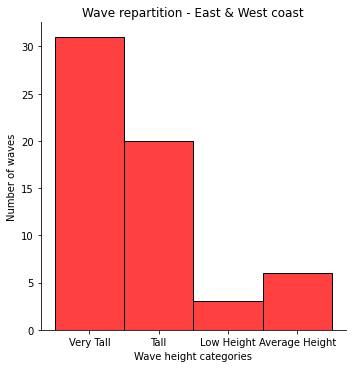

In [22]:
sns.displot(ndf,x='Wave height cat',color='r')
plt.xlabel('Wave height categories')
plt.ylabel('Number of waves')
plt.title('Wave repartition - East & West coast')

sns.displot(eastcoast,x='Wave height cat',color='g')
plt.xlabel('Wave height categories')
plt.ylabel('Number of waves')
plt.title('Wave repartition - East coast')

sns.displot(westcoast,x='Wave height cat',color='b')
plt.xlabel('Wave height categories')
plt.ylabel('Number of waves')
plt.title('Wave repartition - West coast')

Here it would certainly have been better if I had plotted all these values on the same histogram but I did not manage to do it do to the non numerical values of the Wave height categories. 

We can still see on those graph that there have been more waves on the east coast than on the west coast but a bigger amount of very tall waves on the west coast. 

In [ ]:
waveheightcat = ndf.groupby(['Wave height cat'],as_index=True).mean()
waveheightcat_east = eastcoast.groupby(['Wave height cat'],as_index=False).mean()
waveheightcat_west = westcoast.groupby(['Wave height cat'],as_index=False).mean()
print(waveheightcat)
print(waveheightcat_east)
print(waveheightcat_west)

We can group those values by categories to make further analysis 

In [ ]:
vtallwave = ndf.groupby(['Wave height cat'],as_index=True).get_group('Very Tall')
tallwave = ndf.groupby(['Wave height cat'],as_index=False).get_group('Tall')
avgwave = ndf.groupby(['Wave height cat'],as_index=False).get_group('Average Height')
smallwave = ndf.groupby(['Wave height cat'],as_index=False).get_group('Low Height')
print(vtallwave)
print(tallwave)
print(avgwave) 
print(smallwave) 

# **5) Data Visualization** <a name="Visu"> </a>

First let's create a map displaying all our stations

In [ ]:
# instantiate a feature group for the incidents in the dataframe
station_map = folium.Map(location=[33.721,-78.015], zoom_start=3, tiles='Stamen Terrain')   # 'Stamen Toner', 'Stamen Terrain', 'Mapbox Bright'

# loop through the stations and add each to the incidents feature group
for lat, lng, label in zip(ndf['Longitude'], ndf['Latitude'], ndf['Station number']):
        folium.CircleMarker(location=([lng, lat]),
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='white',
            fill_opacity=0.6,
            tooltip=label,
).add_to(station_map)

# add incidents to map
station_map

All our stations are located around the USA, let's divide our points into two groups: East Coast and West Coast. Then we will compare the information provided by stations on the east coast and those from the west coast. 

In [ ]:
#We first sort the values by station number to divide the dataframe in 2 parts
srtstation = ndf.sort_values(by=['Station number'])

In [ ]:
#Then we slice our sorted dataframe in two parts so that we have the west and the east coast. 
eastcoast = srtstation.loc[(df['Station number'] >= 41002) & (df['Station number'] <= 44066)]
westcoast = srtstation.loc[(df['Station number'] >= 44066) & (df['Station number'] <= 51101)]

We have now West and East coast dataframes and we can compare them.

We want to find some interesting relation between our columns. Let's use the pairplot function from seaborn to see if there are some potential linear relations. 

In [ ]:
sns.pairplot(ndf, plot_kws={'alpha': 0.3})

We don't want to see the scatter plot for all the available variables, after located the interesting graphs, let's focus on them.

In [1]:
sns.set_theme(style='white')
pairplotoklm = sns.pairplot(ndf,diag_kind='kde',
             x_vars=["Air T°C",'Air T°C','Sea surface T°C'],
             y_vars=["Sea surface T°C", "Dewpoint T°C",'Dewpoint T°C'],
             height=4, # make the plot 3 units high
             aspect=2) # width should be 2 time height

NameError: ignored

It also seems that the wave height and the Energy flux are related linearly.

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x='Wave height (m)', y='Energy flux (kW/m)', data=ndf)

Let's detail and plot a regression plot to have a line for each graph.

Text(0, 0.5, 'Dewpoint T°C')

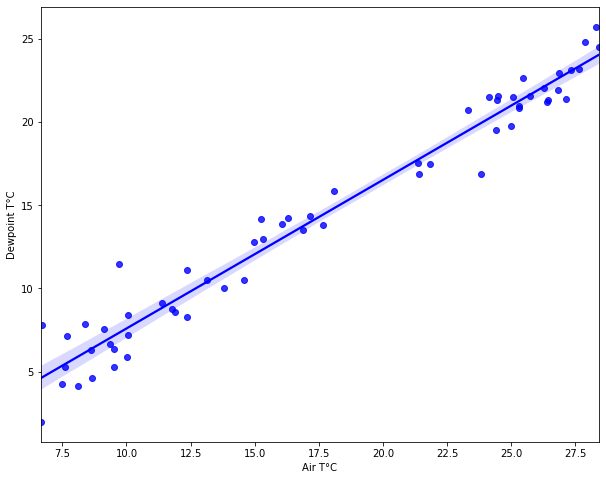

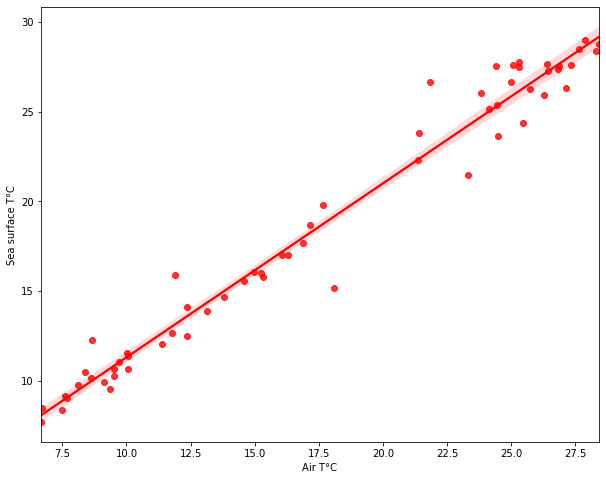

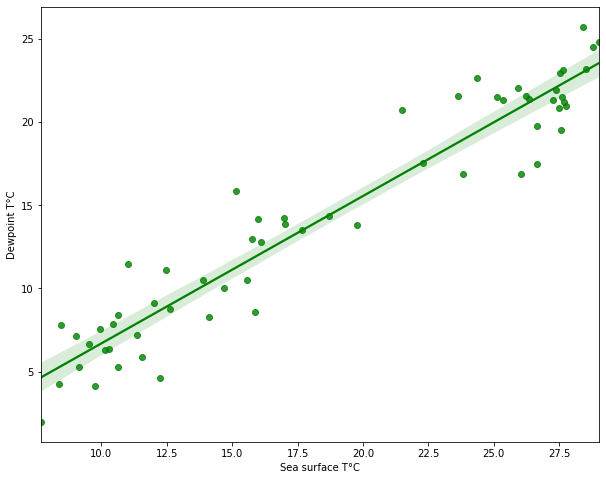

In [23]:
plt.figure(figsize=(10,8))
sns.regplot(x='Air T°C',y='Dewpoint T°C', data=ndf, color='b') 
plt.xlabel('Air T°C')
plt.ylabel('Dewpoint T°C')

plt.figure(figsize=(10,8))
sns.regplot(x='Air T°C',y='Sea surface T°C', data=ndf, color='r') 
plt.xlabel('Air T°C')
plt.ylabel('Sea surface T°C')


plt.figure(figsize=(10,8))
sns.regplot(x='Sea surface T°C',y='Dewpoint T°C', data=ndf, color='g') 
plt.xlabel('Sea surface T°C')
plt.ylabel('Dewpoint T°C')

It seems all of these have a linear relation, we want to justify our expectations calculating the Pearson coefficient

It could be interesting to use correlations to see what are the values susceptible to be related one to another. 

- __1__ : Fully correlated
- __0__ : No relation
- __-1__: Anti-correlated

In [24]:
ndf.corr()

,Station number,Longitude,Latitude,Wind direction (°),Wind speed (m/s),Wave height (m),Dominant wave period (s),Avg wave period (s),Wave direction (°),Sea level pressure (hPa),Air T°C,Sea surface T°C,Dewpoint T°C,Energy flux (kW/m)
Station number,1.000000,-0.839522,0.297143,0.215093,0.099994,0.461225,0.512379,0.483125,0.539759,-0.308410,-0.431366,-0.456394,-0.389416,0.573647
Longitude,-0.839522,1.000000,-0.436655,-0.196586,-0.155037,-0.513695,-0.480835,-0.480193,-0.535979,0.502978,0.419786,0.432262,0.390610,-0.652216
Latitude,0.297143,-0.436655,1.000000,0.523579,-0.003141,0.026116,0.038931,0.000942,0.430852,-0.462643,-0.896152,-0.888672,-0.884193,0.148952
Wind direction (°),0.215093,-0.196586,0.523579,1.000000,-0.160099,0.137023,0.405173,0.283956,0.783568,-0.018497,-0.662162,-0.652884,-0.638203,0.208969
Wind speed (m/s),0.099994,-0.155037,-0.003141,-0.160099,1.000000,0.510398,0.035145,0.160325,-0.123134,-0.391842,-0.011763,-0.003924,-0.010124,0.458952
Wave height (m),0.461225,-0.513695,0.026116,0.137023,0.510398,1.000000,0.803043,0.900754,0.442877,-0.204544,-0.066492,-0.090218,-0.035692,0.959486
Dominant wave period (s),0.512379,-0.480835,0.038931,0.405173,0.035145,0.803043,1.000000,0.967792,0.659955,-0.062185,-0.143909,-0.176537,-0.111164,0.766398
Avg wave period (s),0.483125,-0.480193,0.000942,0.283956,0.160325,0.900754,0.967792,1.000000,0.594124,-0.065440,-0.074605,-0.108043,-0.045157,0.855198
Wave direction (°),0.539759,-0.535979,0.430852,0.783568,-0.123134,0.442877,0.659955,0.594124,1.000000,-0.051250,-0.585373,-0.597416,-0.547356,0.527403
Sea level pressure (hPa),-0.308410,0.502978,-0.462643,-0.018497,-0.391842,-0.204544,-0.062185,-0.065440,-0.051250,1.000000,0.405419,0.408770,0.368491,-0.230351


We see here that the Wind direction and the wave direction, the Air temperature and the Sea surface temperature, the Air temperature and the dewpoint temperature do all have a correlation close to 1.

We also need to know if our findings are statistically significant. We use the p-value as a threshhold to determine if the statistic meets the criteria ( α ) for significance.

p < 0.01: we are 99% confidence that the finding is accurate

p < 0.05: we are 95% confidence that the finding is accurate

p < 0.1 : we are 90% confidence that the finding is accurate

In [ ]:
#First the wind direction and the wave direction correlation:
pearson_coef,p_value = stats.pearsonr(ndf['Wind direction (°)'], ndf['Wave direction (°)'])
print("The Pearson Correlation Coefficient of the wind direction and the wave direction is", pearson_coef, " with a P-value of P =", p_value)

#Sea surface temperature and the air temperature correlation:
pearson_coef,p_value = stats.pearsonr(ndf['Sea surface T°C'], ndf['Air T°C'])
print("The Pearson Correlation Coefficient of the sea surface and the air temperature is", pearson_coef, " with a P-value of P =", p_value)

#Air temperature and the dewpoint temperature correlation:
pearson_coef,p_value = stats.pearsonr(ndf['Dewpoint T°C'], ndf['Air T°C'])
print("The Pearson Correlation Coefficient of the dewpoint temperature and the air temperature is", pearson_coef, " with a P-value of P =", p_value)


#Energy flux and wave height correlation:
pearson_coef,p_value = stats.pearsonr(ndf['Wave height (m)'], ndf['Energy flux (kW/m)'])
print("The Pearson Correlation Coefficient of the dewpoint temperature and the air temperature is", pearson_coef, " with a P-value of P =", p_value)

Since we have a good pearson coefficient for the sea surface / air temperature, the dewpoint temperature / air temperature and the Wave height / Energy flux, we can confirm that our findings are statistically significant and there is a linear relation between thos values.

When we look at our dataframe, it seem that the height of the length depends on the energy flux. Let's plot these two categories on a boxplot to see the proportion of wave categories regarding their associated energy flux

In [ ]:
#We plot the Wave height categories 
plt.figure(figsize=(15,8)) 
sns.boxplot(data=ndf, x='Energy flux (kW/m)', y='Wave height cat').set_title("Wave energy Analysis for both East & Westcoast")


We see that there are a lot of very tall waves and that the median value for the tallest ones is 15000 kW/m. There is a maximum value at 23k kW/m and an outlier at 29k kW/m. And what about the comparison between east and west coast ?

In [ ]:
#We plot the Wave height categories  
plt.figure(figsize=(15,8))
sns.boxplot(x='Energy flux (kW/m)', y='Wave height cat',data=eastcoast).set_title("Wave energy Analysis for Eastcoast")
print('')
print('')

NameError: ignored

<Figure size 1080x576 with 0 Axes>

In [ ]:
#We plot the Wave height categories  
plt.figure(figsize=(15,8))
sns.boxplot(x='Energy flux (kW/m)', y='Wave height cat',data=westcoast).set_title("Wave energy Analysis for Westcoast")

NameError: ignored

<Figure size 1080x576 with 0 Axes>

Comparing those two last graphs, we can see that waves in the east coast are way more powerful with a bigger energy flux than those from the west coast looking at the median value for very tall waves.

Now let's plot the wave height category, but this time versus the dominant wave period (e.g. the period with the maximum wave energy), to see if the very tall waves are still a dominant data

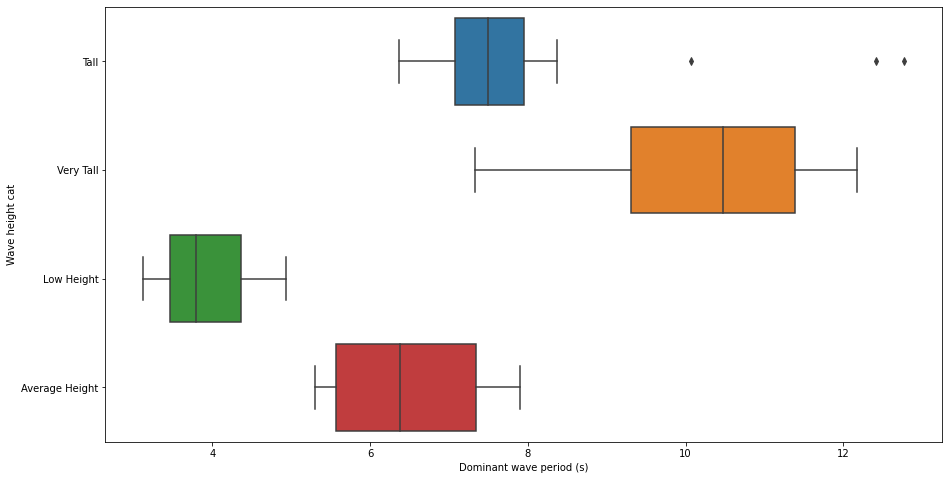

In [ ]:
#We plot the Wave height categories  
plt.figure(figsize=(15,8))
sns.boxplot(x='Dominant wave period (s)', y='Wave height cat',data=df)
print('')
print('')

As we can see, the median dominant wave period is between 10 and 11 seconds for the very tall waves. The median values of the tall waves corresponds to the maximum value of time of the average height waves and the minimum of the very tall waves which is around 7s.

# **6) Conclusion** <a name="CCL"> </a>

During this analysis, we focused on the wave height and the energy flux generated. We could conclude that the wave height depends on the energy flux and that tall waves have a longer dominant wave period. We also saw that the east coast was a more active region regarding the waves activity. We found that there was a linear relation between air temperature and sea surface temperature, between sea surface and dewpoint temperatures and between air/dewpoint temperature.